# Tests avant CASD

In [ ]:
# Activate multi-output in notebook
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import vaex
import pandas as pd
from leximpact_prepare_data.scenario_tools.calib_and_copules import Quantile

In [ ]:
# vdf = vaex.open("/mnt/data-out/leximpact/fake//fake_pote_full.parquet")
vdf = vaex.open("/mnt/data-out/leximpact/fake//fake_pote_light.parquet")

In [ ]:
# vdf.get_column_names()

In [ ]:
%%time
data = vdf.Z1ap.tolist()

CPU times: user 4.94 ms, sys: 798 µs, total: 5.74 ms
Wall time: 10.8 ms


In [ ]:
%%time
q = Quantile(data)
decile = q.get_quantile(10)

CPU times: user 4.49 ms, sys: 422 µs, total: 4.91 ms
Wall time: 4.76 ms


In [ ]:
q.borders
data[q.borders[0]]
data[q.borders[1]]

[389, 779, 1169, 1559, 1949, 2339, 2729, 3119, 3509, 3899]

390

1109

CPU times: user 39.2 ms, sys: 23.5 ms, total: 62.7 ms
Wall time: 48.1 ms


<Axes: xlabel='lower_bound'>

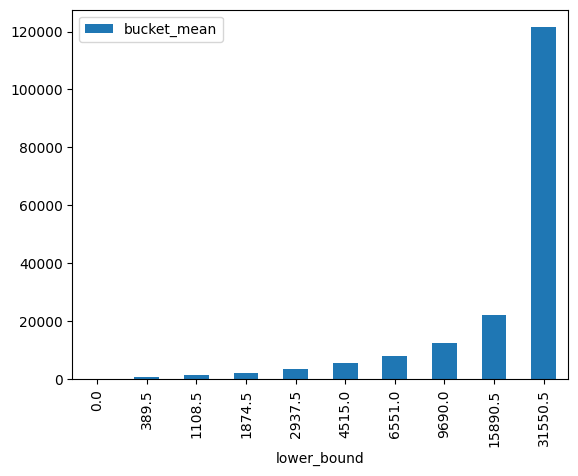

In [ ]:
%%time
df = pd.DataFrame(decile["buckets"])
df.plot.bar(x="lower_bound", y="bucket_mean")

CPU times: user 152 ms, sys: 115 ms, total: 268 ms
Wall time: 127 ms


<Axes: xlabel='lower_bound'>

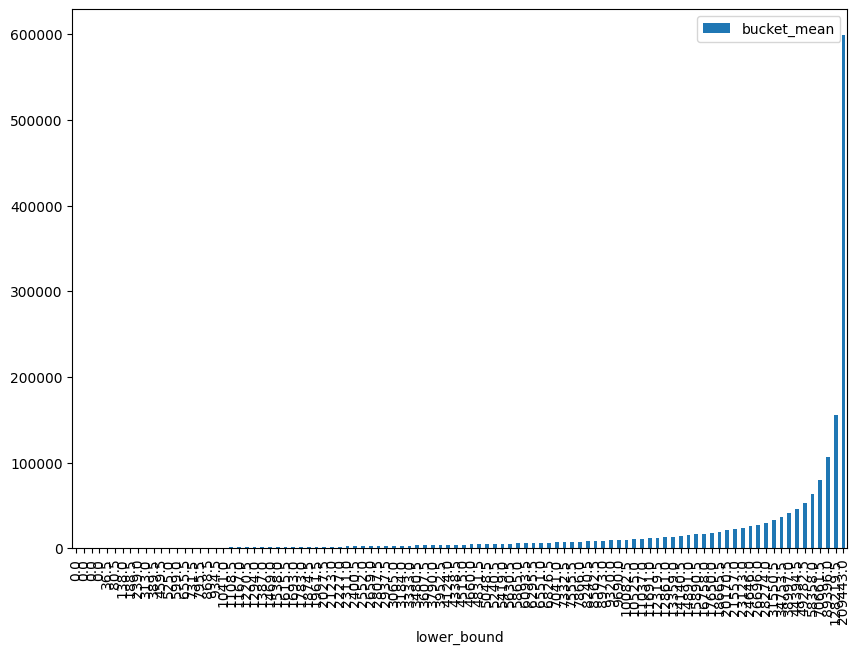

In [ ]:
%%time
centile = q.get_quantile(100)
df = pd.DataFrame(centile["buckets"])
df.plot.bar(x="lower_bound", y="bucket_mean", figsize=(10, 7))